# Project Assignment

* [link to d3 home page](https://titanbender.github.io) 
* [link to git repo](https://github.com/titanbender/titanbender.github.io) 

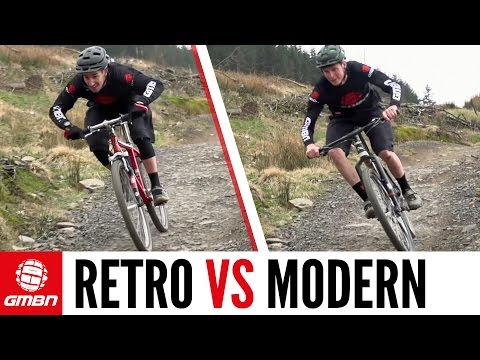

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("FoEdy_Vy_V4",width=640, height=360)

In [2]:
# Used libraries
import json
import numpy as np
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
import collections 
from sklearn.cluster import KMeans

## Defined functions

In [3]:
# Create JSON function 
def createJSON(my_dict, file_name):
    with open(file_name, 'w') as outfile:
        json.dump(my_dict, outfile)
        outfile.close()

In [8]:
# Data function for 2A
def parseJson(year,file_name):
    # number of obs. 
    tmp_DF = raw_DF[raw_DF["YEAR"] == year]
    #
    tmp_lat = list(raw_DF["LATITUDE"])
    tmp_lon = list(raw_DF["LONGITUDE"])
    tmp_hour = list(raw_DF["HOUR"])
    tmp_borough = list(raw_DF["BOROUGH"])
    # 
    N_tot = len(tmp_lat)
    
    # output
    out_dict = [{'lat': tmp_lat[ii],
                 'lon': tmp_lon[ii],
                 'r': 1,
                 #'district': tmp_borough[ii],
                 #'hour': tmp_hour[ii],
                 #'class': "all"
                } for ii in range(0,N_tot)]
    #
    createJSON(out_dict, file_name)    

## Data manipulation

In [9]:
## Data manipulation
# Load data
raw_DF = pd.read_csv("data/raw_data.csv", low_memory = False)

# Getting year
year = raw_DF["DATE"].apply(lambda x: x.split('/'))
raw_DF["YEAR"] = year.apply(lambda x: int(x[2]))

# Getting hour
hour = raw_DF["TIME"].apply(lambda x: x.split(':'))
raw_DF["HOUR"] = hour.apply(lambda x: int(x[0]))
raw_DF["TIME_DEC"] = hour.apply(lambda x: float(int(x[0]) + int(x[1])/60) )

# String values for month
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']

# Getting month
month = raw_DF["DATE"].apply(lambda x: x.split('/'))
raw_DF["MONTH"] = month.apply(lambda x: month_list[int(x[0])-1])

# remove unused columns
raw_DF_tmp = raw_DF.drop(['ZIP CODE',
                          'LOCATION',
                          'UNIQUE KEY',
                          'ON STREET NAME',
                          'CROSS STREET NAME',
                          'OFF STREET NAME'], axis = 1)
# raw_DF_tmp.head()

## Pratical data information

In [10]:
# Pratical data information
print "First day of observations:", min(raw_DF["DATE"])
print "Last day of observations:", max(raw_DF["DATE"])
print "Total number of obs. in mentioned period:" , len(raw_DF['DATE'])
print ""
print "Observations per month:"
print raw_DF["MONTH"].value_counts()
print ""
print "Accidents per district:"
print raw_DF["BOROUGH"].value_counts()
print ""
print "Geographic area of each district:"
print "To be done.... "
print ""
print "Ratio between geographic area per district and number of accidents"
print "To be done.... "
print ""
print "Types of accidents"
print "To be done.... "
print ""
print "Accidents per year:"
print raw_DF["YEAR"].value_counts()
print ""
print "Average accidents per day:", int(len(raw_DF)/356/4)
print "Day with most accidents", max(raw_DF['DATE'].value_counts())
print ""
print "Top 10 days with most accidents:" 
print raw_DF['DATE'].value_counts()[0:9]


First day of observations: 01/01/2013
Last day of observations: 12/31/2016
Total number of obs. in mentioned period: 601313

Observations per month:
May          56432
June         54375
October      52628
March        52484
December     51799
April        51490
July         51468
November     51315
January      51049
February     46477
September    41507
August       40289
Name: MONTH, dtype: int64

Accidents per district:
BROOKLYN         184622
QUEENS           155957
MANHATTAN        155788
BRONX             78176
STATEN ISLAND     26770
Name: BOROUGH, dtype: int64

Geographic area of each district:
To be done.... 

Ratio between geographic area per district and number of accidents
To be done.... 

Types of accidents
To be done.... 

Accidents per year:
2015    163417
2014    156293
2013    155958
2016    125645
Name: YEAR, dtype: int64

Average accidents per day: 422
Day with most accidents 843

Top 10 days with most accidents:
01/21/2014    843
02/03/2014    776
03/06/2015    715

## 1. Motivation
- What is your dataset?
- Why did you choose this/these particular dataset(s)?
- What was your goal for the end user's experience?

## 2. Basic stats. Let's understand the dataset better
- Write about your choices in data cleaning and preprocessing
- Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)

## 3. Theory. Which theoretical tools did you use?
- Describe which machine learning tools you use and why the tools you've chosen are right for the problem you're solving.
- Talk about your model selection. How did you split the data in to test/training. Did you use cross validation?
- Explain the model performance. How did you measure it? Are your results what you expected?

## 4. Visualizations
- Explain the visualizations you've chosen.
- Why are they right for the story you want to tell?

## 5. Discussion. Think critically about your creation
- What went well?,
- What is still missing? What could be improved?, Why?

## Some additional notes:
- Make sure that you use references when they're needed and follow academic standards.

In [ ]:
## Questions to explore

#1: Visualize the geographic location of the accidents occurances over the years

#2: Visualize the geographic location of the accidents orrances based upon the vehicle type

#3: Create a bar plot to visualize crime occurances from year to year also broken down into types of accidents 

#4: Analyze if there is any seasonality of other patterns correlated with time

#5: Create a prediction tool that can be used to predict the type of accident based upon goegraphic location. 

In [ ]:
parseJson(2013, 'data/geo_plot_2013.json')
parseJson(2014, 'data/geo_plot_2014.json')
parseJson(2015, 'data/geo_plot_2015.json')
parseJson(2016, 'data/geo_plot_2016.json')